# Import Statements

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import operator
import sys

# Train and Validation Split

In [39]:
#Pass the percentage of data you need for test like 20 % 
def train_split(df,test_per):
    indices=df.index.tolist()
    test_size=round(len(df)*(test_per/100))
    random.seed(0)
    test_indices=random.sample(population=indices,k=test_size)
    valid_df=df.loc[test_indices]
    train_df=df.drop(test_indices)
    return train_df,valid_df

## Distance Functions

In [40]:
def euclidean_dist(data,inst,dimensions):
    dist=0
    sum=0
    for i in range(0,dimensions):
        sum+=(data[i]-inst[i])**2
    dist=math.sqrt(sum)
    return dist

In [41]:
def manhattan_dist(data,inst,dimensions):
    dist=0
    for i in range(0,dimensions):
        dist+=abs(data[i]-inst[i])
    return dist

In [42]:
def chebyshev_dist(data,inst,dimensions):
    dist=0
    for i in range(0,dimensions):
        temp=abs(data[i]-inst[i])
        if(temp > dist):
            dist=temp
    return dist

## Find Neighbours

In [43]:
#Calculate distance from one validation point to all the training points and returns sorted list
def find_neighbours_eucli(df,inst,dimensions):
    neighbours={}
    for i in range(0,len(df)):
        dist=euclidean_dist(df.iloc[i],inst,dimensions)
        neighbours[i]=dist
    sorted_neighbours = sorted(neighbours.items(), key=operator.itemgetter(1))
    return sorted_neighbours

In [44]:
def find_neighbours_manhttn(df,inst,dimensions):
    neighbours={}
    for i in range(0,len(df)):
        dist=manhattan_dist(df.iloc[i],inst,dimensions)
        neighbours[i]=dist
    sorted_neighbours = sorted(neighbours.items(), key=operator.itemgetter(1))
    return sorted_neighbours

In [45]:
def find_neighbours_chebyshev(df,inst,dimensions):
    neighbours={}
    for i in range(0,len(df)):
        dist=chebyshev_dist(df.iloc[i],inst,dimensions)
        neighbours[i]=dist
    sorted_neighbours = sorted(neighbours.items(), key=operator.itemgetter(1))
    return sorted_neighbours

## Prediction

In [46]:
def predict(train_df,neighbours,k,list_classes,label):
    prediction=None
    count=[0]*len(list_classes)
    for i in range(0,k):
        index=neighbours[i][0]
        output=train_df.iloc[index][label]
        for j in range(0,len(list_classes)):
            if(output == list_classes[j]):
                count[j]=count[j]+1
    max_index=max_count(count)
    prediction=list_classes[max_index]
    return prediction 

# Confusion Matrix

In [47]:
def confusion_matrix_eucli(train_df,valid_df,k,list_classes,dimensions,label):
    total=len(valid_df)
    no_classes=len(list_classes)
    correct=0
    conf_mat = [[0 for x in range(no_classes)] for y in range(no_classes)] 
    TN=0
    TP=0
    FP=0
    FN=0
    for i in range(0,total):
        inst=valid_df.iloc[i]
        actual=inst[label]
        #print("Actual-",actual)
        neighbours=find_neighbours_eucli(train_df,inst,dimensions)
        predicted=predict(train_df,neighbours,k,list_classes,label)
        #print("Predicted-",predicted)
        if(actual == predicted):
            correct+=1
            
        for i in range(0,no_classes):
            for j in range(0,no_classes):
                if( actual == list_classes[i] and predicted == list_classes[j]):
                    conf_mat[i][j]=conf_mat[i][j]+1
    
    accuracy=correct/total
    print("Accuracy - ",accuracy)
    #print(correct," / ",total," - ",accuracy)
    
    #print("Confusion Matrix - ")
    #print(conf_mat)
    conf_arr=np.array(conf_mat)
    #print(conf_arr)
    
    total_counts=[0]*no_classes
    for i in range(0,no_classes):
        row=conf_arr[i]
        total_counts[i]=row.sum()
    #print(total_counts)
    
    TP=[0]*no_classes
    for i in range(0,no_classes):
        for j in range(0,no_classes):
            if(i == j):
                TP[i]=conf_mat[i][j]
    #print("TP-",TP)
    
    FN=[0]*no_classes
    for i in range(0,no_classes):
        FN[i]=total_counts[i]-TP[i]
    #print("FN-",FN)
    
    FP=[0]*no_classes
    for i in range(0,no_classes):
        for j in range(0,no_classes):
            FP[j]+=conf_mat[i][j]
        FP[i]-=TP[i]
    #print("FP-",FP)
    
    TN=[0]*no_classes
    for i in range(0,no_classes):
        for j in range(0,no_classes):
            for k in range(0,no_classes):
                if( i!=k and j!=k):
                    TN[k]+=conf_mat[i][j]
    #print("TN-",TN)
    
    precision=[0]*no_classes
    for i in range(0,no_classes):
        precision[i]=TP[i]/(TP[i]+FP[i])
    print("Precison-",precision)
    
    recall=[0]*no_classes
    for i in range(0,no_classes):
        recall[i]=TP[i]/(TP[i]+FN[i])
    print("Recall-",recall)
    
    f1score=[0]*no_classes
    for i in range(0,no_classes):
        f1score[i]=2/((1/precision[i])+(1/recall[i]))
    print("F1score-",f1score)
    
    return

In [48]:
def accuracy_eucli(train_df,valid_df,k,list_classes,dimensions,label):
    total=len(valid_df)
    no_classes=len(list_classes)
    correct=0
    for i in range(0,total):
        inst=valid_df.iloc[i]
        actual=inst[label]
        #print("Actual-",actual)
        neighbours=find_neighbours_eucli(train_df,inst,dimensions)
        predicted=predict(train_df,neighbours,k,list_classes,label)
        #print("Predicted-",predicted)
        if(actual == predicted):
            correct+=1
    accuracy=correct/total
    return accuracy

In [49]:
def plot_eucli(max_k,train_df,valid_df,list_classes,dimensions,label):
    x_labels=[]
    y_labels=[]
    for k in range(1,max_k,2):      #oddnumbers
        x_labels.append(k)
        y_labels.append(accuracy_eucli(train_df,valid_df,k,list_classes,dimensions,label))
        
    area=10*np.pi
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.title("k v/s Accuracy KNN-IrisDataset(Euclidean distance)")
    plt.scatter(x_labels, y_labels, s=area, c='blue', alpha=0.5)

    plt.show()
    return

In [50]:
def confusion_matrix_manhttn(train_df,valid_df,k,list_classes,dimensions,label):
    total=len(valid_df)
    no_classes=len(list_classes)
    correct=0
    conf_mat = [[0 for x in range(no_classes)] for y in range(no_classes)] 
    TN=0
    TP=0
    FP=0
    FN=0
    for i in range(0,total):
        inst=valid_df.iloc[i]
        actual=inst[label]
        #print("Actual-",actual)
        neighbours=find_neighbours_manhttn(train_df,inst,dimensions)
        predicted=predict(train_df,neighbours,k,list_classes,label)
        #print("Predicted-",predicted)
        if(actual == predicted):
            correct+=1
            
        for i in range(0,no_classes):
            for j in range(0,no_classes):
                if( actual == list_classes[i] and predicted == list_classes[j]):
                    conf_mat[i][j]=conf_mat[i][j]+1
    
    accuracy=correct/total
    print("Accuracy - ",accuracy)
    #print(correct," / ",total," - ",accuracy)
    
    #print("Confusion Matrix - ")
    #print(conf_mat)
    conf_arr=np.array(conf_mat)
    #print(conf_arr)
    
    total_counts=[0]*no_classes
    for i in range(0,no_classes):
        row=conf_arr[i]
        total_counts[i]=row.sum()
    #print(total_counts)
    
    TP=[0]*no_classes
    for i in range(0,no_classes):
        for j in range(0,no_classes):
            if(i == j):
                TP[i]=conf_mat[i][j]
    #print("TP-",TP)
    
    FN=[0]*no_classes
    for i in range(0,no_classes):
        FN[i]=total_counts[i]-TP[i]
    #print("FN-",FN)
    
    FP=[0]*no_classes
    for i in range(0,no_classes):
        for j in range(0,no_classes):
            FP[j]+=conf_mat[i][j]
        FP[i]-=TP[i]
    #print("FP-",FP)
    
    TN=[0]*no_classes
    for i in range(0,no_classes):
        for j in range(0,no_classes):
            for k in range(0,no_classes):
                if( i!=k and j!=k):
                    TN[k]+=conf_mat[i][j]
    #print("TN-",TN)
    
    precision=[0]*no_classes
    for i in range(0,no_classes):
        precision[i]=TP[i]/(TP[i]+FP[i])
    print("Precison-",precision)
    
    recall=[0]*no_classes
    for i in range(0,no_classes):
        recall[i]=TP[i]/(TP[i]+FN[i])
    print("Recall-",recall)
    
    f1score=[0]*no_classes
    for i in range(0,no_classes):
        f1score[i]=2/((1/precision[i])+(1/recall[i]))
    print("F1score-",f1score)
    
    return

In [51]:
def accuracy_manhttn(train_df,valid_df,k,list_classes,dimensions,label):
    total=len(valid_df)
    no_classes=len(list_classes)
    correct=0
    for i in range(0,total):
        inst=valid_df.iloc[i]
        actual=inst[label]
        #print("Actual-",actual)
        neighbours=find_neighbours_manhttn(train_df,inst,dimensions)
        predicted=predict(train_df,neighbours,k,list_classes,label)
        #print("Predicted-",predicted)
        if(actual == predicted):
            correct+=1
    accuracy=correct/total
    return accuracy

In [52]:
def plot_manhttn(max_k,train_df,valid_df,list_classes,dimensions,label):
    x_labels=[]
    y_labels=[]
    for k in range(1,max_k,2):      #oddnumbers
        x_labels.append(k)
        y_labels.append(accuracy_manhttn(train_df,valid_df,k,list_classes,dimensions,label))
        
    area=10*np.pi
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.title("k v/s Accuracy KNN-IrisDataset(Manhattan distance)")
    plt.scatter(x_labels, y_labels, s=area, c='blue', alpha=0.5)

    plt.show()
    return

In [53]:
def confusion_matrix_chebyshev(train_df,valid_df,k,list_classes,dimensions,label):
    total=len(valid_df)
    no_classes=len(list_classes)
    correct=0
    conf_mat = [[0 for x in range(no_classes)] for y in range(no_classes)] 
    TN=0
    TP=0
    FP=0
    FN=0
    for i in range(0,total):
        inst=valid_df.iloc[i]
        actual=inst[label]
        #print("Actual-",actual)
        neighbours=find_neighbours_chebyshev(train_df,inst,dimensions)
        predicted=predict(train_df,neighbours,k,list_classes,label)
        #print("Predicted-",predicted)
        if(actual == predicted):
            correct+=1
            
        for i in range(0,no_classes):
            for j in range(0,no_classes):
                if( actual == list_classes[i] and predicted == list_classes[j]):
                    conf_mat[i][j]=conf_mat[i][j]+1
    
    accuracy=correct/total
    print("Accuracy - ",accuracy)
    #print(correct," / ",total," - ",accuracy)
    
    #print("Confusion Matrix - ")
    #print(conf_mat)
    conf_arr=np.array(conf_mat)
    #print(conf_arr)
    
    total_counts=[0]*no_classes
    for i in range(0,no_classes):
        row=conf_arr[i]
        total_counts[i]=row.sum()
    #print(total_counts)
    
    TP=[0]*no_classes
    for i in range(0,no_classes):
        for j in range(0,no_classes):
            if(i == j):
                TP[i]=conf_mat[i][j]
    #print("TP-",TP)
    
    FN=[0]*no_classes
    for i in range(0,no_classes):
        FN[i]=total_counts[i]-TP[i]
    #print("FN-",FN)
    
    FP=[0]*no_classes
    for i in range(0,no_classes):
        for j in range(0,no_classes):
            FP[j]+=conf_mat[i][j]
        FP[i]-=TP[i]
    #print("FP-",FP)
    
    TN=[0]*no_classes
    for i in range(0,no_classes):
        for j in range(0,no_classes):
            for k in range(0,no_classes):
                if( i!=k and j!=k):
                    TN[k]+=conf_mat[i][j]
    #print("TN-",TN)
    
    precision=[0]*no_classes
    for i in range(0,no_classes):
        precision[i]=TP[i]/(TP[i]+FP[i])
    print("Precison-",precision)
    
    recall=[0]*no_classes
    for i in range(0,no_classes):
        recall[i]=TP[i]/(TP[i]+FN[i])
    print("Recall-",recall)
    
    f1score=[0]*no_classes
    for i in range(0,no_classes):
        f1score[i]=2/((1/precision[i])+(1/recall[i]))
    print("F1score-",f1score)
    
    return

In [54]:
def accuracy_chebyshev(train_df,valid_df,k,list_classes,dimensions,label):
    total=len(valid_df)
    no_classes=len(list_classes)
    correct=0
    for i in range(0,total):
        inst=valid_df.iloc[i]
        actual=inst[label]
        #print("Actual-",actual)
        neighbours=find_neighbours_chebyshev(train_df,inst,dimensions)
        predicted=predict(train_df,neighbours,k,list_classes,label)
        #print("Predicted-",predicted)
        if(actual == predicted):
            correct+=1
    accuracy=correct/total
    return accuracy

In [55]:
def plot_chebyshev(max_k,train_df,valid_df,list_classes,dimensions,label):
    x_labels=[]
    y_labels=[]
    for k in range(1,max_k,2):      #oddnumbers
        x_labels.append(k)
        y_labels.append(accuracy_chebyshev(train_df,valid_df,k,list_classes,dimensions,label))
        
    area=10*np.pi
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.title("k v/s Accuracy KNN-IrisDataset(Chebyshev distance)")

    plt.scatter(x_labels, y_labels, s=area, c='blue', alpha=0.5)

    plt.show()
    return

# Helper Functions 

In [56]:
def max_count(counts):
    max_index=None
    max_val=0
    for i in range(0,len(counts)):
        if( counts[i] >= max_val):
            max_val=counts[i]
            max_index=i
    return max_index

# # Main

In [57]:
def main():
    k=1
    csv_file="Iris/Iris.csv"
    dimensions=4   #To calulate dist 
    list_classes=['Iris-setosa','Iris-virginica','Iris-versicolor']
    
    df=pd.read_csv(csv_file , header=None)
    train_df,valid_df=train_split(df,20)
    label=df.columns[-1]
    
    len_train=len(train_df)
    max_k=round(math.sqrt(len_train))

    print("Euclidean Distance with k-",k)
    print("------------------------------")
    confusion_matrix_eucli(train_df,valid_df,k,list_classes,dimensions,label)
    
    print()
    print("Plot of Accuracy with change in k")
    plot_eucli(max_k,train_df,valid_df,list_classes,dimensions,label)
    
    print("Manhattan Distance with k-",k)
    print("------------------------------")
    confusion_matrix_manhttn(train_df,valid_df,k,list_classes,dimensions,label)
    
    print()
    print("Plot of Accuracy with change in k")
    plot_manhttn(max_k,train_df,valid_df,list_classes,dimensions,label)
    
    print("Chebyshev Distance with k-",k)
    print("------------------------------")
    confusion_matrix_chebyshev(train_df,valid_df,k,list_classes,dimensions,label)
    
    print()
    print("Plot of Accuracy with change in k")
    plot_chebyshev(max_k,train_df,valid_df,list_classes,dimensions,label)
   
    return

Euclidean Distance with k- 1
------------------------------
Accuracy -  1.0
Precison- [1.0, 1.0, 1.0]
Recall- [1.0, 1.0, 1.0]
F1score- [1.0, 1.0, 1.0]

Plot of Accuracy with change in k


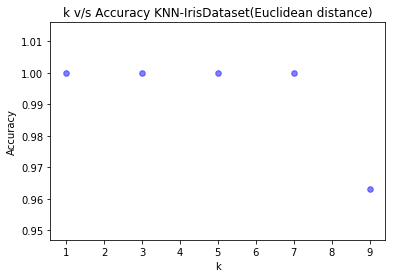

Manhattan Distance with k- 1
------------------------------
Accuracy -  0.9629629629629629
Precison- [1.0, 1.0, 0.9]
Recall- [1.0, 0.875, 1.0]
F1score- [1.0, 0.9333333333333333, 0.9473684210526315]

Plot of Accuracy with change in k


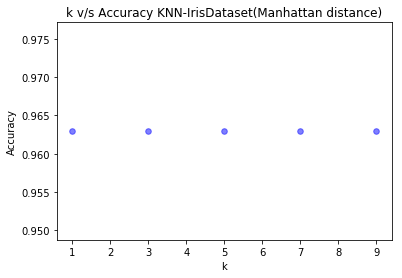

Chebyshev Distance with k- 1
------------------------------
Accuracy -  1.0
Precison- [1.0, 1.0, 1.0]
Recall- [1.0, 1.0, 1.0]
F1score- [1.0, 1.0, 1.0]

Plot of Accuracy with change in k


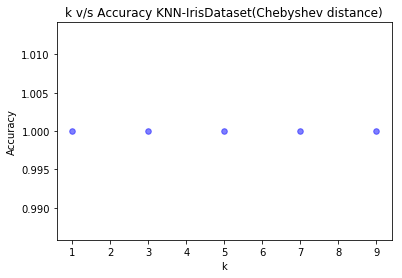

In [58]:
if __name__ == "__main__":
    main()